<a href="https://colab.research.google.com/github/issacridhin/S5_Predictive-Analysis/blob/main/2348546_Lab5_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = "/content/Absenteeism_at_work.xls"
data = pd.read_excel(file_path)
# Display the first few rows of the dataset
print(data.head())


   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0 

#Performing EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

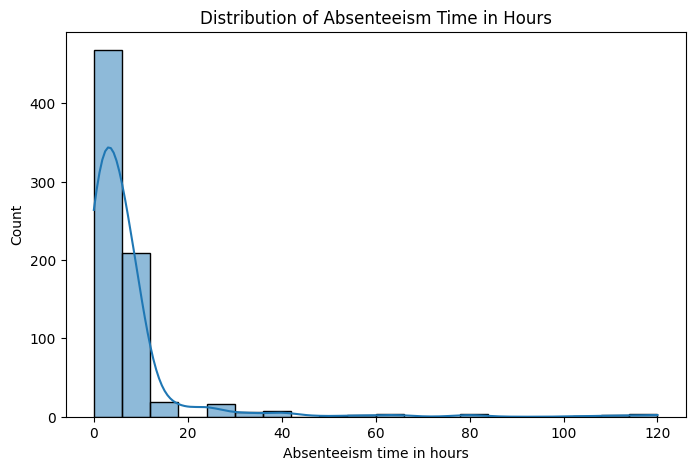

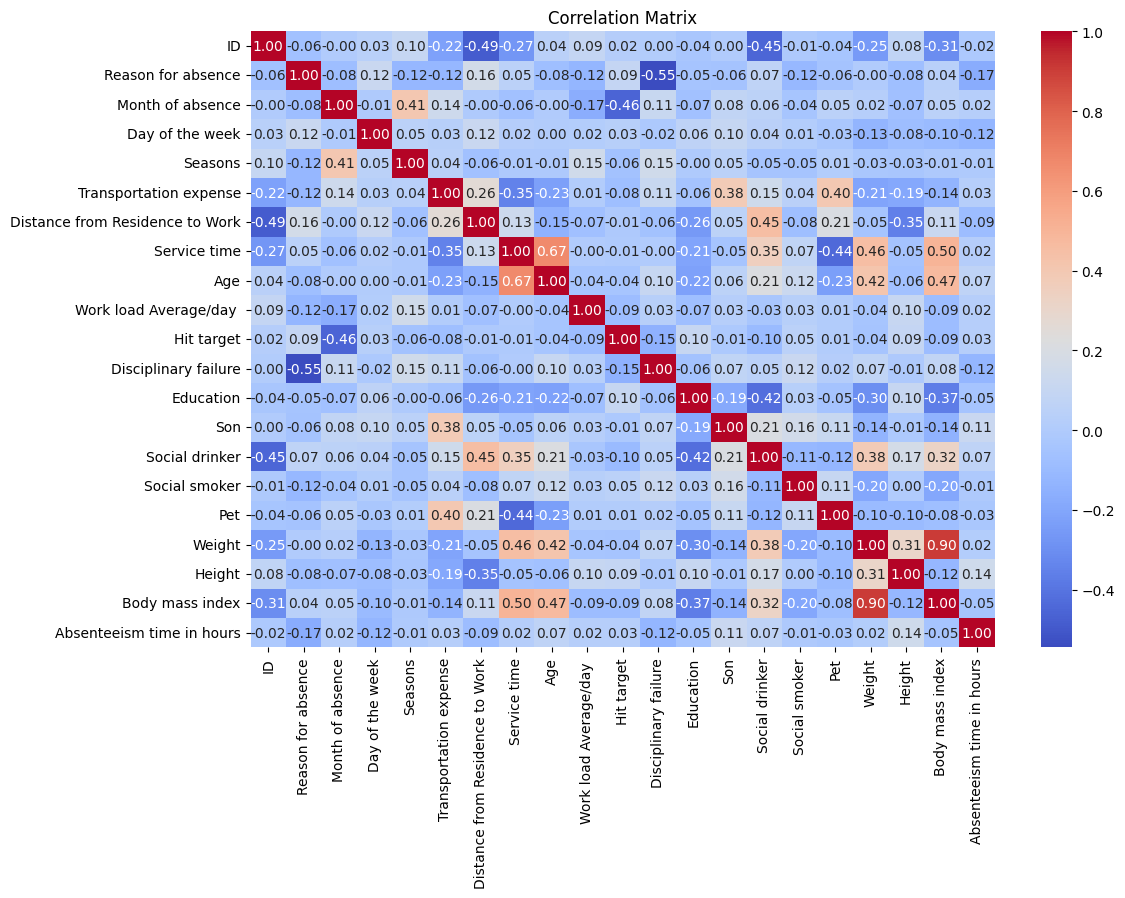

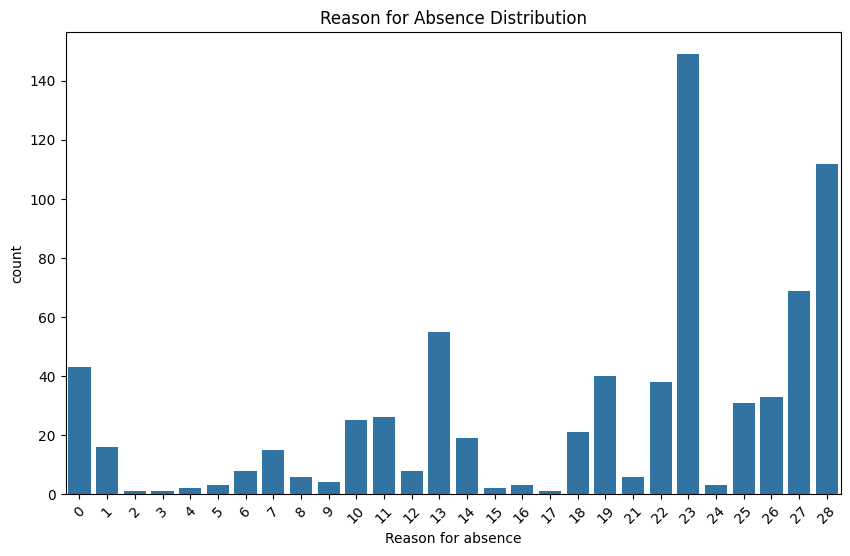

In [ ]:
# Visualize the distribution of the target variable 'Absenteeism time in hours'
plt.figure(figsize=(8, 5))
sns.histplot(data['Absenteeism time in hours'], kde=True, bins=20)
plt.title('Distribution of Absenteeism Time in Hours')
plt.show()

# Visualize the correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Check for class distribution in 'Reason for absence'
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason for absence', data=data)
plt.title('Reason for Absence Distribution')
plt.xticks(rotation=45)
plt.show()

#Data Preprocessing

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop ID column (irrelevant for clustering)
data_cleaned = data.drop(columns=['ID'])

# Normalize the numerical columns
scaler = StandardScaler()
numerical_cols = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                  'Work load Average/day ', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Display the cleaned dataset
print(data_cleaned.head())


   Reason for absence  Month of absence  Day of the week  Seasons  \
0                  26                 7                3        1   
1                   0                 7                3        1   
2                  23                 7                4        1   
3                   7                 7                5        1   
4                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   
2               -0.632665                         1.441240      1.242825   
3                0.861947                        -1.661258      0.329981   
4                1.011408                         0.429556      0.101770   

        Age  Work load Average/day   Hit target  Disciplinary failure  \
0 -0.532868               -0.818212          97        

#Clustering (K-Means)

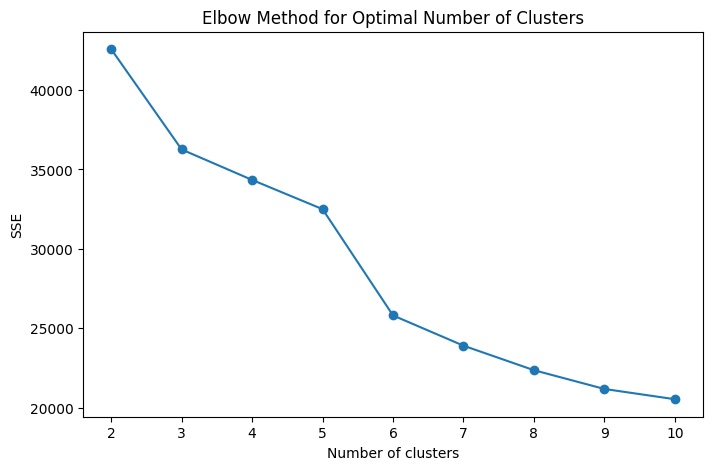

Silhouette Score for K-Means: 0.32328751744245443
Silhouette Score for Agglomerative Clustering: 0.2697751856556631


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Determine the optimal number of clusters using the Elbow method for K-Means
sse = []
cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# From the plot, let's assume the optimal number of clusters is k=3 (adjust this based on the elbow curve)
optimal_k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_cleaned)

# Calculate silhouette score for K-Means
kmeans_sil_score = silhouette_score(data_cleaned, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_sil_score}')

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(data_cleaned)

# Calculate silhouette score for Agglomerative Clustering
agg_sil_score = silhouette_score(data_cleaned, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {agg_sil_score}')


K-Means Cluster Analysis:
                Reason for absence  Month of absence  Day of the week  \
KMeans_Cluster                                                          
0                         2.483871          7.139785         3.623656   
1                        25.140271          6.282805         4.054299   
2                        14.034146          6.043902         3.746341   

                 Seasons  Transportation expense  \
KMeans_Cluster                                     
0               2.827957                0.293191   
1               2.477376               -0.050646   
2               2.560976               -0.023811   

                Distance from Residence to Work  Service time       Age  \
KMeans_Cluster                                                            
0                                     -0.253603     -0.079817  0.244387   
1                                      0.113233      0.018127 -0.065661   
2                                     -0.129091

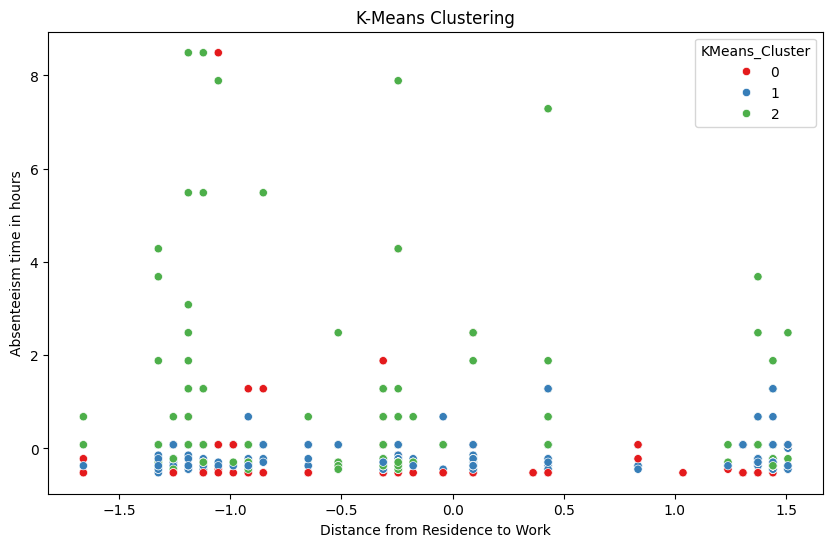

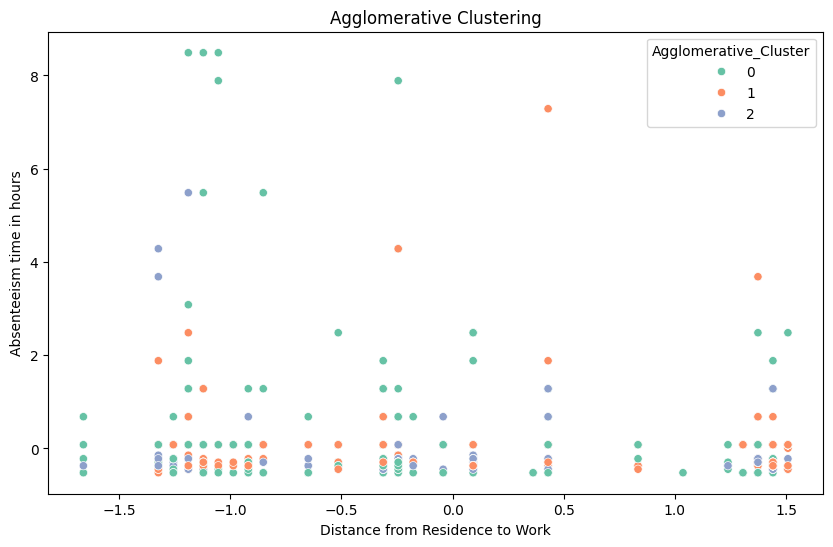

In [ ]:
# Add the cluster labels to the dataset
data_cleaned['KMeans_Cluster'] = kmeans_labels
data_cleaned['Agglomerative_Cluster'] = agg_labels

# Analyze the mean values for each cluster (K-Means)
print("K-Means Cluster Analysis:")
print(data_cleaned.groupby('KMeans_Cluster').mean())

# Analyze the mean values for each cluster (Agglomerative)
print("Agglomerative Cluster Analysis:")
print(data_cleaned.groupby('Agglomerative_Cluster').mean())

# Visualize K-Means clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance from Residence to Work', y='Absenteeism time in hours', hue='KMeans_Cluster', data=data_cleaned, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

# Visualize Agglomerative clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance from Residence to Work', y='Absenteeism time in hours', hue='Agglomerative_Cluster', data=data_cleaned, palette='Set2')
plt.title('Agglomerative Clustering')
plt.show()


Key Insights:
Cluster 0 (Green) dominates the higher absenteeism times (above 4 hours). This indicates that employees in this cluster tend to have longer periods of absenteeism compared to the other two clusters. They also vary widely in terms of their distance from home to work.

Cluster 1 (Red): This cluster is concentrated around lower absenteeism times, often below 2 hours. It also spans a range of distances from residence to work, but typically shows lower absenteeism compared to Cluster 2.

Cluster 2 (Blue): This cluster has points scattered between Clusters 0 and 2, both in terms of absenteeism and distance. It tends to represent a middle ground, with absenteeism times ranging between 0 and 4 hours.

What it tells:
Distance from Residence to Work: Doesn't seem to have a strong correlation with absenteeism time. Employees who live closer (left on the X-axis) or farther away (right on the X-axis) both appear in all three clusters.

Absenteeism time: Differentiates the clusters more clearly. Cluster 0 members are more likely to take longer absences, while Cluster 2 members tend to take shorter absences.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': range(2, 11),  # Test cluster sizes from 2 to 10
    'init': ['k-means++', 'random'],  # Initialization methods
    'n_init': [10, 20],  # Number of initializations
    'max_iter': [300, 500]  # Maximum number of iterations
}

# Create a KMeans instance
kmeans = KMeans(random_state=42)

# Create a custom scoring function for silhouette score
silhouette_scorer = make_scorer(silhouette_score)

# Create a GridSearchCV instance with the custom scoring function
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid,
                           cv=3, scoring=silhouette_scorer, n_jobs=-1)

# Fit the model
grid_search.fit(data_cleaned)

# Get the best parameters and the best silhouette score
best_params = grid_search.best_params_
best_silhouette_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score from Grid Search: {best_silhouette_score}')

# Using the best parameters to fit KMeans
optimal_kmeans = KMeans(n_clusters=best_params['n_clusters'],
                         init=best_params['init'],
                         n_init=best_params['n_init'],
                         max_iter=best_params['max_iter'],
                         random_state=42)

optimal_kmeans_labels = optimal_kmeans.fit_predict(data_cleaned)

# Calculate silhouette score for the optimized KMeans model
optimal_kmeans_silhouette_score = silhouette_score(data_cleaned, optimal_kmeans_labels)
print(f'Optimized Silhouette Score for K-Means: {optimal_kmeans_silhouette_score}')

# Add the optimized cluster labels to the dataset
data_cleaned['Optimized_KMeans_Cluster'] = optimal_kmeans_labels

# Analyze the mean values for each optimized cluster
print("Optimized K-Means Cluster Analysis:")
print(data_cleaned.groupby('Optimized_KMeans_Cluster').mean())



Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Best Silhouette Score from Grid Search: nan
Optimized Silhouette Score for K-Means: 0.4427494332327988
Optimized K-Means Cluster Analysis:
                          Reason for absence  Month of absence  \
Optimized_KMeans_Cluster                                         
0                                   8.320675          6.506329   
1                                  24.349901          6.238569   

                          Day of the week   Seasons  Transportation expense  \
Optimized_KMeans_Cluster                                                      
0                                3.725738  2.734177                0.082478   
1                                4.003976  2.455268               -0.038862   

                          Distance from Residence to Work  Service time  \
Optimized_KMeans_Cluster                                                  
0                                         

You have clustered the data into two clusters based on various features related to absenteeism. The key metrics and results from your analysis are as follows:

Best Parameters:

Initialization Method: 'k-means++' (ensures better convergence)
Max Iterations: 300
Number of Clusters: 2
Number of Initializations: 10

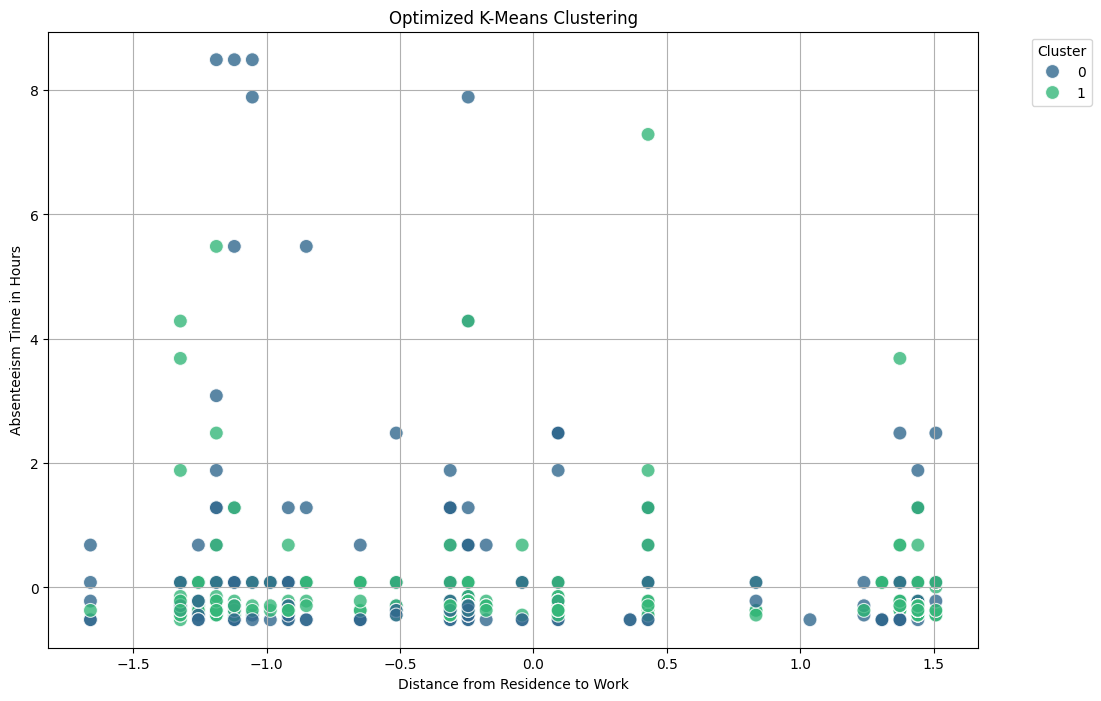

In [ ]:
# Visualize the optimized K-Means clustering results with improved clarity
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Distance from Residence to Work',
                y='Absenteeism time in hours',
                hue='Optimized_KMeans_Cluster',
                data=data_cleaned,
                palette='viridis',  # Change palette for better distinction
                s=100,  # Increase marker size
                alpha=0.8,  # Add some transparency
                edgecolor='w')  # Optional: Add white edges to markers for clarity

plt.title('Optimized K-Means Clustering')
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Absenteeism Time in Hours')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True)
plt.show()


Inferences and Justifications

**Cluster Characteristics:**

Cluster 0 has a lower average reason for absence (8.32 days) compared to Cluster 1 (24.35 days). This indicates that individuals in Cluster 0 are less frequently absent compared to those in Cluster 1.
Cluster 1 shows a significantly higher absenteeism duration, suggesting that the factors leading to absenteeism are more prevalent or severe for this group.

**Demographic Differences:**

Cluster 0 tends to include younger employees (Age: 0.13) who might have a different work-life balance or support systems compared to Cluster 1, which has a slight majority of older employees (Age: -0.06). This may indicate a generational difference in work engagement or health.

Service and Workload Analysis:

Employees in Cluster 0 have a higher workload average (0.22) compared to Cluster 1 (which is slightly below average at -0.10). This could suggest that a manageable workload might be linked to lower absenteeism in Cluster 0.

**Silhouette Score Context:**


In summary, the K-Means clustering analysis has successfully identified two distinct groups related to absenteeism. Cluster 1 is characterized by higher absenteeism rates and certain demographic factors, suggesting potential areas for intervention to improve employee engagement and reduce absenteeism.